In [73]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [74]:
# Read the CSV file into a DataFrame
df = pd.read_csv('train.csv')
index = np.arange(0,len(df))
df.set_index(index,inplace=True)
df = df.rename_axis('ID')

In [75]:
df

,text,Y
ID,,
0,advice Talk neighbours family exchange phone n...,2
1,Coronavirus Australia: Woolworths give elderly...,2
2,"My food stock one empty... PLEASE, panic, THER...",2
3,"Me, ready go supermarket outbreak. Not I'm par...",0
4,As news regionÂs first confirmed COVID- case ...,2
...,...,...
41147,Airline pilots offering stock supermarket shel...,1
41148,Response complaint provided citing COVID- rela...,0
41149,You know itÂs getting tough rationing toilet ...,2


In [76]:
# Extract the 'text' column from the DataFrame
x=df['text']
x


ID
0        advice Talk neighbours family exchange phone n...
1        Coronavirus Australia: Woolworths give elderly...
2        My food stock one empty... PLEASE, panic, THER...
3        Me, ready go supermarket outbreak. Not I'm par...
4        As news regionÂs first confirmed COVID- case ...
                               ...                        
41147    Airline pilots offering stock supermarket shel...
41148    Response complaint provided citing COVID- rela...
41149    You know itÂs getting tough rationing toilet ...
41150      Is wrong smell hand sanitizer starting turn on?
41151    Well new/used Rift S going $ . Amazon rn altho...
Name: text, Length: 41152, dtype: object

In [77]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(x,test_size=0.2)

In [78]:
x_train

ID
13619    Today, I customer call grocery store angry adj...
4997     I guess new normal hitting grocery store . (TP...
14075    I know much here's one way show appreciation A...
21592             The crisis drives inequities home. Cf. ?
22266    Needing clarity. A friend mine immunocompromis...
                               ...                        
34251                         store chain dies family says
9347     Ok I front room psyching go supermarket I tryi...
20355    Waterstones chief exec James Daunt described c...
39098    The Chartered Trading Standards Institute (CTS...
23718    I work local grocery store. IÂm going tell yÂ...
Name: text, Length: 32921, dtype: object

In [79]:
# Display the count of each sentiment category in the 'Y' column
df['Y'].value_counts().sort_index()

0    15398
1     7708
2    18046
Name: Y, dtype: int64

In [80]:
# Import SentimentIntensityAnalyzer from nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [81]:
df_train=pd.DataFrame(x_train)

In [82]:
df_train

,text
ID,
13619,"Today, I customer call grocery store angry adj..."
4997,I guess new normal hitting grocery store . (TP...
14075,I know much here's one way show appreciation A...
21592,The crisis drives inequities home. Cf. ?
22266,Needing clarity. A friend mine immunocompromis...
...,...
34251,store chain dies family says
9347,Ok I front room psyching go supermarket I tryi...
20355,Waterstones chief exec James Daunt described c...


In [83]:
#aplly sentiment analysis to each row of the dataframe
sia = SentimentIntensityAnalyzer()
res={}
for i,row in tqdm(df_train.iterrows(),total=len(df_train)):
    text = row['text']
    myID=i
    res[myID]=sia.polarity_scores(text)
    

  0%|          | 0/32921 [00:00<?, ?it/s]

In [84]:
vaders=pd.DataFrame(res).T
#vaders=vaders.reset_index().rename(columns={'index':'ID'})
vaders=vaders.merge(df_train,left_index=True,right_index=True)

In [85]:
vaders

,neg,neu,pos,compound,text
13619,0.104,0.633,0.263,0.6124,"Today, I customer call grocery store angry adj..."
4997,0.000,1.000,0.000,0.0000,I guess new normal hitting grocery store . (TP...
14075,0.000,0.772,0.228,0.7579,I know much here's one way show appreciation A...
21592,0.451,0.549,0.000,-0.6249,The crisis drives inequities home. Cf. ?
22266,0.037,0.617,0.346,0.8748,Needing clarity. A friend mine immunocompromis...
...,...,...,...,...,...
34251,0.000,1.000,0.000,0.0000,store chain dies family says
9347,0.203,0.716,0.082,-0.3327,Ok I front room psyching go supermarket I tryi...
20355,0.308,0.629,0.063,-0.8481,Waterstones chief exec James Daunt described c...
39098,0.000,1.000,0.000,0.0000,The Chartered Trading Standards Institute (CTS...


In [86]:
# Define a function to classify sentiment based on compound score
def classify_sentiment(compound_score, threshold=0.05):
    if compound_score >= threshold:
        return 2  # Positive
    elif compound_score <= -threshold:
        return 0  # Negative
    else:
        return 1  # Neutral
vaders['Sentiment'] = vaders['compound'].apply(classify_sentiment)


In [87]:
vaders

,neg,neu,pos,compound,text,Sentiment
13619,0.104,0.633,0.263,0.6124,"Today, I customer call grocery store angry adj...",2
4997,0.000,1.000,0.000,0.0000,I guess new normal hitting grocery store . (TP...,1
14075,0.000,0.772,0.228,0.7579,I know much here's one way show appreciation A...,2
21592,0.451,0.549,0.000,-0.6249,The crisis drives inequities home. Cf. ?,0
22266,0.037,0.617,0.346,0.8748,Needing clarity. A friend mine immunocompromis...,2
...,...,...,...,...,...,...
34251,0.000,1.000,0.000,0.0000,store chain dies family says,1
9347,0.203,0.716,0.082,-0.3327,Ok I front room psyching go supermarket I tryi...,0
20355,0.308,0.629,0.063,-0.8481,Waterstones chief exec James Daunt described c...,0
39098,0.000,1.000,0.000,0.0000,The Chartered Trading Standards Institute (CTS...,1


In [88]:
vaders.to_csv('Train Dataset.csv')

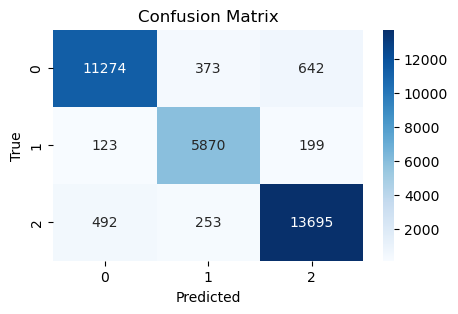

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93     12289
           1       0.90      0.95      0.93      6192
           2       0.94      0.95      0.95     14440

    accuracy                           0.94     32921
   macro avg       0.93      0.94      0.93     32921
weighted avg       0.94      0.94      0.94     32921



In [91]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


y_true = df.loc[x_train.index, 'Y']

# Encoding the sentiment labels for comparison
le = LabelEncoder()
y_true_encoded = le.fit_transform(y_true)
y_pred_encoded = le.transform(vaders['Sentiment'])

# Building the confusion matrix
conf_matrix = confusion_matrix(y_true_encoded, y_pred_encoded)

# Plotting the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Displaying the classification report
class_report = classification_report(y_true_encoded, y_pred_encoded, target_names=le.classes_.astype(str))
print("Classification Report:\n", class_report)
